# SWOT North American Continent Hydrology Dataset

## Finding ways to visualize SWOT Hydrology River Shapefile Dataset

Authored by Nicholas Tarpinian, *PO.DAAC*

## Summary

The following tutorial is looking to explore geospatial libraries and visualizing vector datasets without the use of a GIS desktop software. Specifically looking at the latest Surface Water and Ocean Topography (SWOT) river reach hydrology dataset.

------

## Requirements

### 1. Compute environment

- **Local compute environment** e.g. laptop, server: this tutorial can be run on your local machine.
- **Utilizing Anaconda Navigator** to create your enviroments. Accessing the Conda-Forge channel to install geopsatial libraries, e.g. GDAL and GeoPandas.

### 2. Earthdata Login

An Earthdata Login account is required to access data, as well as discover restricted data, from the NASA Earthdata system. Thus, to access NASA data, you need Earthdata Login. Please visit https://urs.earthdata.nasa.gov to register and manage your Earthdata Login account. This account is free to create and only takes a moment to set up.

------

### Learning Objectives:
- Accessing SWOT shapefile hydrology dataset through earthaccess and visualizing it locally.
- Visualizing the dataset through the use of geospatial libraries; including Geopandas & Matplotlib.
- Visualzing either a single river reach or merging multiple reaches to a single shapefile.
- Querying specific variables of interest. 

------

### Import libraries

In [1]:
import os
import glob 
from pathlib import Path
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
import zipfile
import earthaccess
from earthaccess import Auth, DataCollections, DataGranules, Store

## Authentication with earthaccess

In this notebook, we will be calling the authentication in the below cell.

In [2]:
auth = earthaccess.login()

EARTHDATA_USERNAME and EARTHDATA_PASSWORD are not set in the current environment, try setting them or use a different strategy (netrc, interactive)
You're now authenticated with NASA Earthdata Login
Using token with expiration date: 12/22/2023
Using .netrc file for EDL


### Search using `earthaccess` for SWOT River Reaches

Each dataset has it's own unique collection concept ID. For this dataset it is SWOT_L2_HR_RiverSP_1.0. We don't need 1000+ files, we just want the river reach files over North America. SWOT files come in "reach" and "node" versions in the same collection, here we want the 10km reaches rather than the nodes. We will also only get files for North America, or 'NA' via wildcard search.

In [5]:
results = earthaccess.search_data(short_name = 'SWOT_L2_HR_RIVERSP_1.1', 
                                  temporal = ('2023-04-08 00:00:00', '2023-04-25 23:59:59'),
                                  granule_name = '*Reach*_NA_*') # here we filter by Reach files (not node), pass #13 and continent code=NA

Granules found: 119


### Download the Data into a folder

In [ ]:
earthaccess.download(results, "../datasets/data_downloads/SWOT_River_Apr2023")

 Getting 119 granules, approx download size: 0.42 GB


QUEUEING TASKS | :   0%|          | 0/119 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/119 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/119 [00:00<?, ?it/s]

['SWOT_L2_HR_RiverSP_Reach_484_009_NA_20230408T035428_20230408T035439_PIB0_01.zip',
 'SWOT_L2_HR_RiverSP_Reach_484_011_NA_20230408T053314_20230408T053322_PIB0_01.zip',
 'SWOT_L2_HR_RiverSP_Reach_484_011_NA_20230408T053314_20230408T053322_PIB0_02.zip',
 'SWOT_L2_HR_RiverSP_Reach_484_013_NA_20230408T071821_20230408T071832_PIB0_01.zip',
 'SWOT_L2_HR_RiverSP_Reach_484_022_NA_20230408T143144_20230408T143150_PIB0_01.zip',
 'SWOT_L2_HR_RiverSP_Reach_484_024_NA_20230408T161231_20230408T161242_PIB0_01.zip',
 'SWOT_L2_HR_RiverSP_Reach_484_026_NA_20230408T175410_20230408T175414_PIB0_01.zip',
 'SWOT_L2_HR_RiverSP_Reach_485_009_NA_20230409T034506_20230409T034517_PIB0_01.zip',
 'SWOT_L2_HR_RiverSP_Reach_485_011_NA_20230409T052352_20230409T052400_PIB0_01.zip',
 'SWOT_L2_HR_RiverSP_Reach_485_013_NA_20230409T070859_20230409T070910_PIB0_01.zip',
 'SWOT_L2_HR_RiverSP_Reach_485_022_NA_20230409T142222_20230409T142228_PIB0_01.zip',
 'SWOT_L2_HR_RiverSP_Reach_485_024_NA_20230409T160309_20230409T160320_PIB0_0

### Unzip shapefiles to existing folder

In [9]:
folder = Path("../datasets/data_downloads/SWOT_River_Apr2023")
for item in os.listdir(folder): # loop through items in dir
    if item.endswith(".zip"): # check for ".zip" extension
        zip_ref = zipfile.ZipFile(f"{folder}/{item}") # create zipfile object
        zip_ref.extractall(folder) # extract file to dir
        zip_ref.close() # close file

### Opening a Single Shapefile

Using Geopandas to open & read a single shapefile. (Select desired single pass from list with path to downloaded shapefile)

In [10]:
River = gpd.read_file(folder / 'SWOT_L2_HR_RiverSP_Reach_484_009_NA_20230408T035428_20230408T035439_PIB0_01.shp')
River

reach_id          time      time_tai              time_str      p_lat  \
0    72280200251 -1.000000e+12 -1.000000e+12               no_data  58.099444   
1    72280200261 -1.000000e+12 -1.000000e+12               no_data  58.153381   
2    72280200273 -1.000000e+12 -1.000000e+12               no_data  58.189493   
3    72280200281 -1.000000e+12 -1.000000e+12               no_data  58.202248   
4    72280200293 -1.000000e+12 -1.000000e+12               no_data  58.216592   
..           ...           ...           ...                   ...        ...   
611  73130000021  7.342413e+08  7.342413e+08  2023-04-08T03:54:30Z  41.279229   
612  73130000034  7.342413e+08  7.342413e+08  2023-04-08T03:54:30Z  41.325029   
613  73130000041  7.342413e+08  7.342413e+08  2023-04-08T03:54:30Z  41.356524   
614  73130000054 -1.000000e+12 -1.000000e+12               no_data  41.382209   
615  73130000061 -1.000000e+12 -1.000000e+12               no_data  41.424945   

         p_lon        river_name           wse         wse_u       wse_r_u  \
0   -64.477985           no_data -1.000000e+12 -1.000000e+12 -1.000000e+12   
1   -64.467326           no_data -1.000000e+12 -1.000000e+12 -1.000000e+12   
2   -64.480360           no_data -1.000000e+12 -1.000000e+12 -1.000000e+12   
3   -64.486463           no_data -1.000000e+12 -1.000000e+12 -1.000000e+12   
4   -64.503730           no_data -1.000000e+12 -1.000000e+12 -1.000000e+12   
..         ...               ...           ...           ...           ...   
611 -73.084713  Housatonic River  1.775000e-01  1.160600e-01  7.327000e-02   
612 -73.103215  Housatonic River -1.000000e+12 -1.000000e+12 -1.000000e+12   
613 -73.138070  Housatonic River  7.048900e+00  7.562870e+00  7.562340e+00   
614 -73.172231  Housatonic River -1.000000e+12 -1.000000e+12 -1.000000e+12   
615 -73.230960  Housatonic River -1.000000e+12 -1.000000e+12 -1.000000e+12   

     ...  p_wid_var  p_n_nodes  p_dist_out      p_length         p_maf  \
0    ...   3476.514         43  145938.051   8656.631250 -1.000000e+12   
1    ...   1244.502         43  154604.372   8666.321621 -1.000000e+12   
2    ...  11463.153          9  156433.397   1829.024940 -1.000000e+12   
3    ...   7354.472         14  159328.921   2895.523382 -1.000000e+12   
4    ...    542.971          7  160741.966   1413.044983 -1.000000e+12   
..   ...        ...        ...         ...           ...           ...   
611  ...   8895.093         67   21002.661  13389.150868 -1.000000e+12   
612  ...   2538.331          2   21362.818    360.156442 -1.000000e+12   
613  ...   4857.857         46   30467.980   9105.162038 -1.000000e+12   
614  ...  10522.698          2   30857.397    389.417460 -1.000000e+12   
615  ...  10469.706         82   47161.191  16303.793847 -1.000000e+12   

     p_dam_id  p_n_ch_max  p_n_ch_mod  p_low_slp  \
0           0           3           1          0   
1           0           2           1          0   
2           0           2           1          0   
3           0           1           1          0   
4           0           1           1          0   
..        ...         ...         ...        ...   
611         0           3           1          0   
612     28357           1           1          0   
613         0           2           1          0   
614     19700           2           1          0   
615         0           2           1          0   

                                              geometry  
0    LINESTRING (-64.53530 58.08282, -64.53491 58.0...  
1    LINESTRING (-64.44973 58.12074, -64.44964 58.1...  
2    LINESTRING (-64.48798 58.18298, -64.48748 58.1...  
3    LINESTRING (-64.47272 58.19647, -64.47243 58.1...  
4    LINESTRING (-64.50117 58.21015, -64.50128 58.2...  
..                                                 ...  
611  LINESTRING (-73.10890 41.22987, -73.10875 41.2...  
612  LINESTRING (-73.10110 41.32378, -73.10145 41.3...  
613  LINESTRING (-73.10533 41.32612, -73.10569 41.3...  
614  LINESTRIN

### Plotting a Shapefile

Using Matplotlib to plot the shapefile, then adding a basemap for context using the library Contextily.

Contextily offers a list of basemap providers that can be easily visualized.

https://contextily.readthedocs.io/en/latest/intro_guide.html

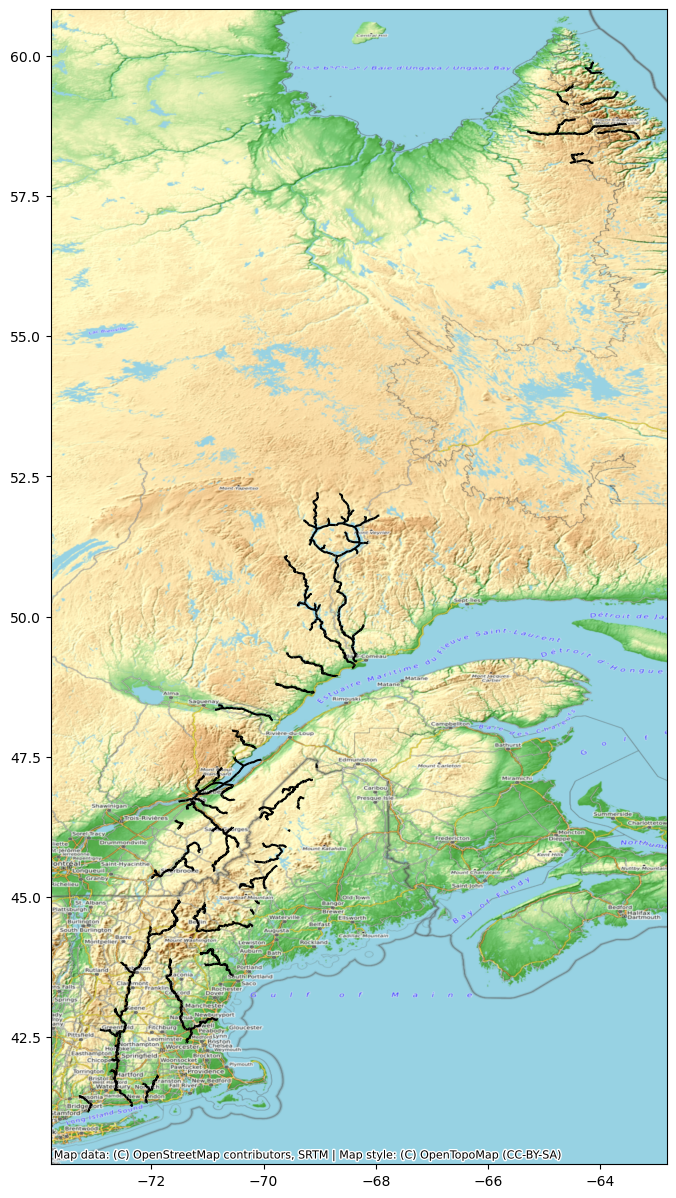

In [11]:
fig, ax = plt.subplots(figsize=(25,15))
River.plot(ax=ax, color='black')
cx.add_basemap(ax, crs=River.crs, source=cx.providers.OpenTopoMap)

### Shapefile Attribute Visualization

Shapefiles have various attributes or variables with each column signifiying individual data values.

Previously, we plotted by showcasing the full path of the river reach on the map. 

You can also plot a shapefile based on a specific variable.

Within Matplotlib you can specifiy the column parameter based on the column within the datasets attributes.

For the example below, we will look at the column 'wse' which stands for water surface elevation.

In [12]:
#First, we set all -999999999999 values to nan so that the color variation shows in the values.
River["wse"] = River.wse.apply(lambda x: x if x > -10 else np.nan)

<Axes: >

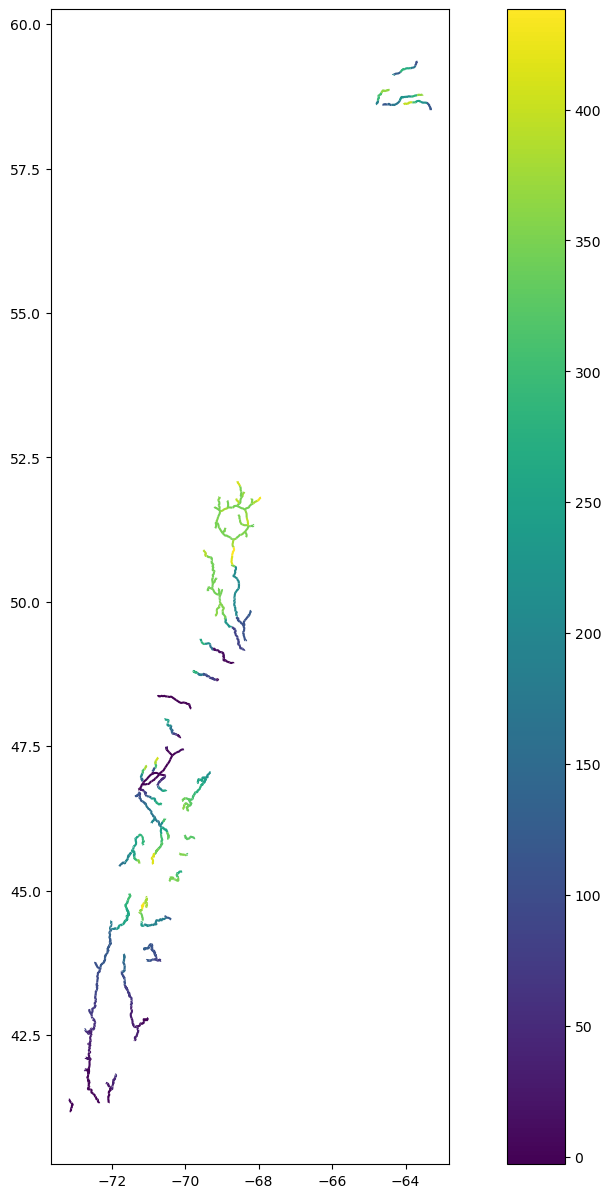

In [13]:
fig, ax = plt.subplots(figsize=(15,15))
River.plot(column='wse', ax=ax, legend=True, cmap='viridis')

### Querying a Shapefile

If you want to search for a specific reach id or a specific length of river reach that is possible through a spatial query using Geopandas. 

Utilizing comparison operators (>, <, ==, >=, <=).

In [16]:
Query = River.query("reach_id == '73130000021'")
Query

reach_id          time      time_tai              time_str      p_lat  \
611  73130000021  7.342413e+08  7.342413e+08  2023-04-08T03:54:30Z  41.279229   

         p_lon        river_name     wse    wse_u  wse_r_u  ...  p_wid_var  \
611 -73.084713  Housatonic River  0.1775  0.11606  0.07327  ...   8895.093   

     p_n_nodes  p_dist_out      p_length         p_maf  p_dam_id  p_n_ch_max  \
611         67   21002.661  13389.150868 -1.000000e+12         0           3   

     p_n_ch_mod  p_low_slp                                           geometry  
611           1          0  LINESTRING (-73.10890 41.22987, -73.10875 41.2...  

[1 rows x 127 columns]

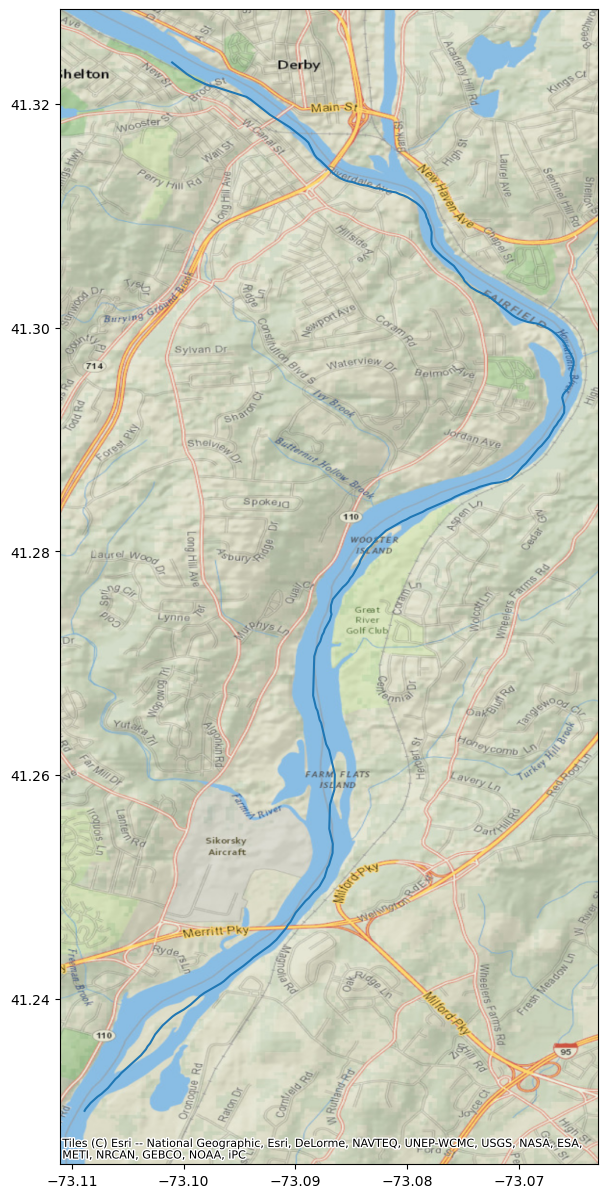

In [17]:
fig, ax = plt.subplots(figsize=(25,15))
Query.plot(ax=ax, legend=True)
cx.add_basemap(ax, crs=River.crs, source=cx.providers.Esri.NatGeoWorldMap)

### You can specify river reaches that have a water surface elevation greater than 35 meters.

In [19]:
WSE = River.query('wse > 35')
WSE

reach_id          time      time_tai              time_str      p_lat  \
11   72290000071  7.342416e+08  7.342416e+08  2023-04-08T03:59:39Z  58.643028   
12   72290000081  7.342416e+08  7.342416e+08  2023-04-08T03:59:39Z  58.714369   
13   72290000091  7.342416e+08  7.342416e+08  2023-04-08T03:59:47Z  58.779820   
14   72290000101  7.342416e+08  7.342416e+08  2023-04-08T03:59:48Z  58.845117   
16   72290000121  7.342416e+08  7.342416e+08  2023-04-08T03:59:38Z  58.609514   
..           ...           ...           ...                   ...        ...   
601  73120000881  7.342413e+08  7.342414e+08  2023-04-08T03:55:20Z  44.351102   
603  73120000901  7.342413e+08  7.342414e+08  2023-04-08T03:55:20Z  44.386181   
605  73120000921  7.342413e+08  7.342414e+08  2023-04-08T03:55:20Z  44.411236   
607  73120000941  7.342413e+08  7.342414e+08  2023-04-08T03:55:29Z  44.452938   
608  73120000951  7.342413e+08  7.342413e+08  2023-04-08T03:54:59Z  42.902949   

         p_lon         river_name       wse     wse_u   wse_r_u  ...  \
11  -64.766113            no_data  189.7760  21.11379  21.11359  ...   
12  -64.738308            no_data  294.3835   0.25529   0.23890  ...   
13  -64.695449            no_data  311.2570   0.32269   0.30988  ...   
14  -64.561029            no_data  365.2844   1.21278   1.20943  ...   
16  -64.561682            no_data  116.8113   3.96043   3.95941  ...   
..         ...                ...       ...       ...       ...  ...   
601 -72.039760    Passumsic River  174.9508   4.47919   4.47829  ...   
603 -72.021869    Passumsic River  173.7937   0.55437   0.54701  ...   
605 -72.014336    Passumsic River  166.5888   0.10145   0.04683  ...   
607 -72.015137    Passumsic River  183.2997   2.06531   2.06334  ...   
608 -72.594959  Connecticut River   74.8295  11.74827  11.74793  ...   

     p_wid_var  p_n_nodes  p_dist_out      p_length         p_maf  p_dam_id  \
11    1146.569         48   90419.400   9535.571996 -1.000000e+12         0   
12     964.470         48   99934.603   9515.202203 -1.000000e+12         0   
13    1322.264         48  109456.472   9521.869544 -1.000000e+12         0   
14    1967.645         91  127615.429  18158.956537 -1.000000e+12         0   
16    4144.533         44   89650.564   8766.735629 -1.000000e+12         0   
..         ...        ...         ...           ...           ...       ...   
601    131.791         33  497855.958   6601.016442 -1.000000e+12         0   
603    309.045         14  501124.567   2797.247947 -1.000000e+12         0   
605    311.007         16  504771.255   3198.652675 -1.000000e+12         0   
607    309.865         31  511419.028   6166.254368 -1.000000e+12         0   
608   4382.769         60  284718.454  11949.727883 -1.000000e+12         0   

     p_n_ch_max  p_n_ch_mod  p_low_slp  \
11            2           1          0   
12            2           1          0   
13            3           1          0   
14            2           1          0   
16            3           1          0   
..          ...         ...        ...   
601           1           1          0   
603           2           1          0   
605           1           1          0   
607           2           1          0   
608           3           1          0   

                                              geometry  
11   LINESTRING (-64.77144 58.60798, -64.77197 58.6...  
12   LINESTRING (-64.74790 58.67648, -64.74812 58.6...  
13   LINESTRING (-64.73733 58.75101, -64.73744 58.7...  
14   LINESTRING (-64.65936 58.81024, -64.65906 58.8...  
16   LINESTRING (-64.62896 58.60922, -64.62844 58.6...  
..                                                 ...  
601  LINESTRING (-72.03762 44.32713, -72.03799 44.3...  
603  LINESTRING (-72.02436 44.37642, -72.02420 44.3...  
605  LINESTRING (-72.02228 44.39954, -72.02190 44.3...  
607  LINESTRING (-72.01456 44.42694, -72.01485 44.4...  
608  LINESTRING (-72.55433 42.86586, -72.55470 42.8...  

[351 rows x 127 columns]

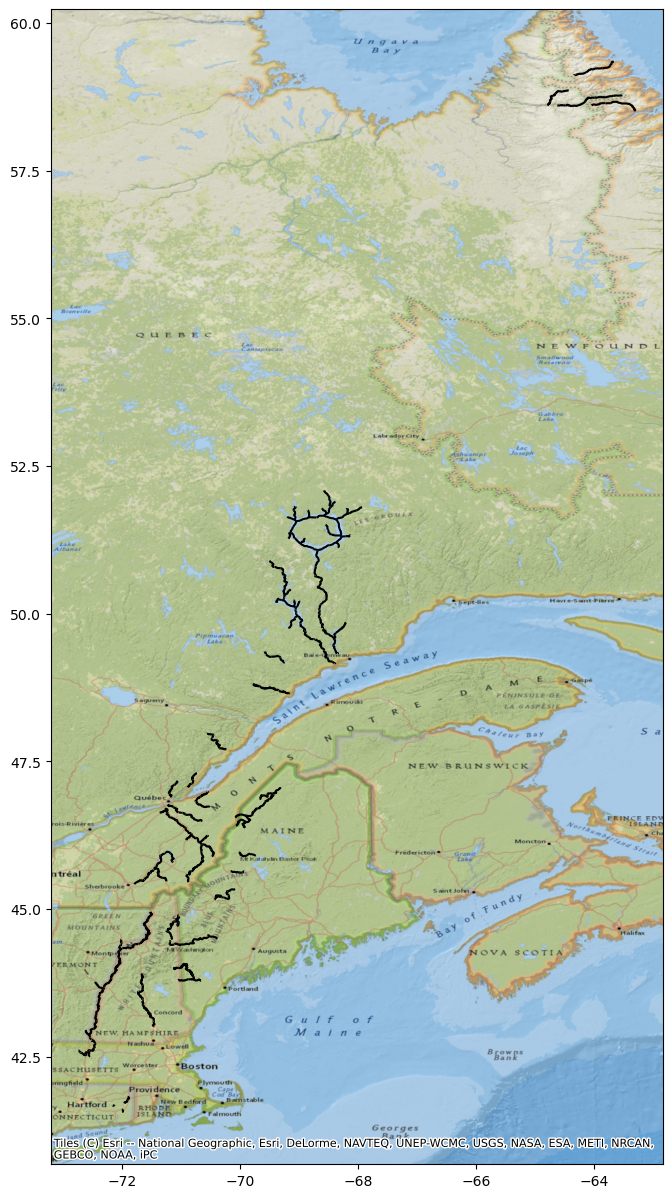

In [20]:
fig, ax = plt.subplots(figsize=(25,15))
WSE.plot(ax=ax, color='black')
cx.add_basemap(ax, crs=River.crs, source=cx.providers.Esri.NatGeoWorldMap)

## Merging multiple reaches to a single shapefile

- If you have multiple River Reaches or Nodes in a folder, it is possible to visualize all on a single map.
- Utilizing both Glob and Pathlib libraries to read the folder, then using Pandas concat to merge the reaches to its own variable.

In [21]:
# State filename extension to look for within folder, in this case .shp which is the shapefile
shapefiles = folder.glob("*.shp")

# Merge/Combine multiple shapefiles in folder into one
gdf = pd.concat([
    gpd.read_file(shp)
    for shp in shapefiles
]).pipe(gpd.GeoDataFrame)

# Export merged geodataframe into shapefile
gdf.to_file(folder / 'SWOTReaches_Aug.shp')

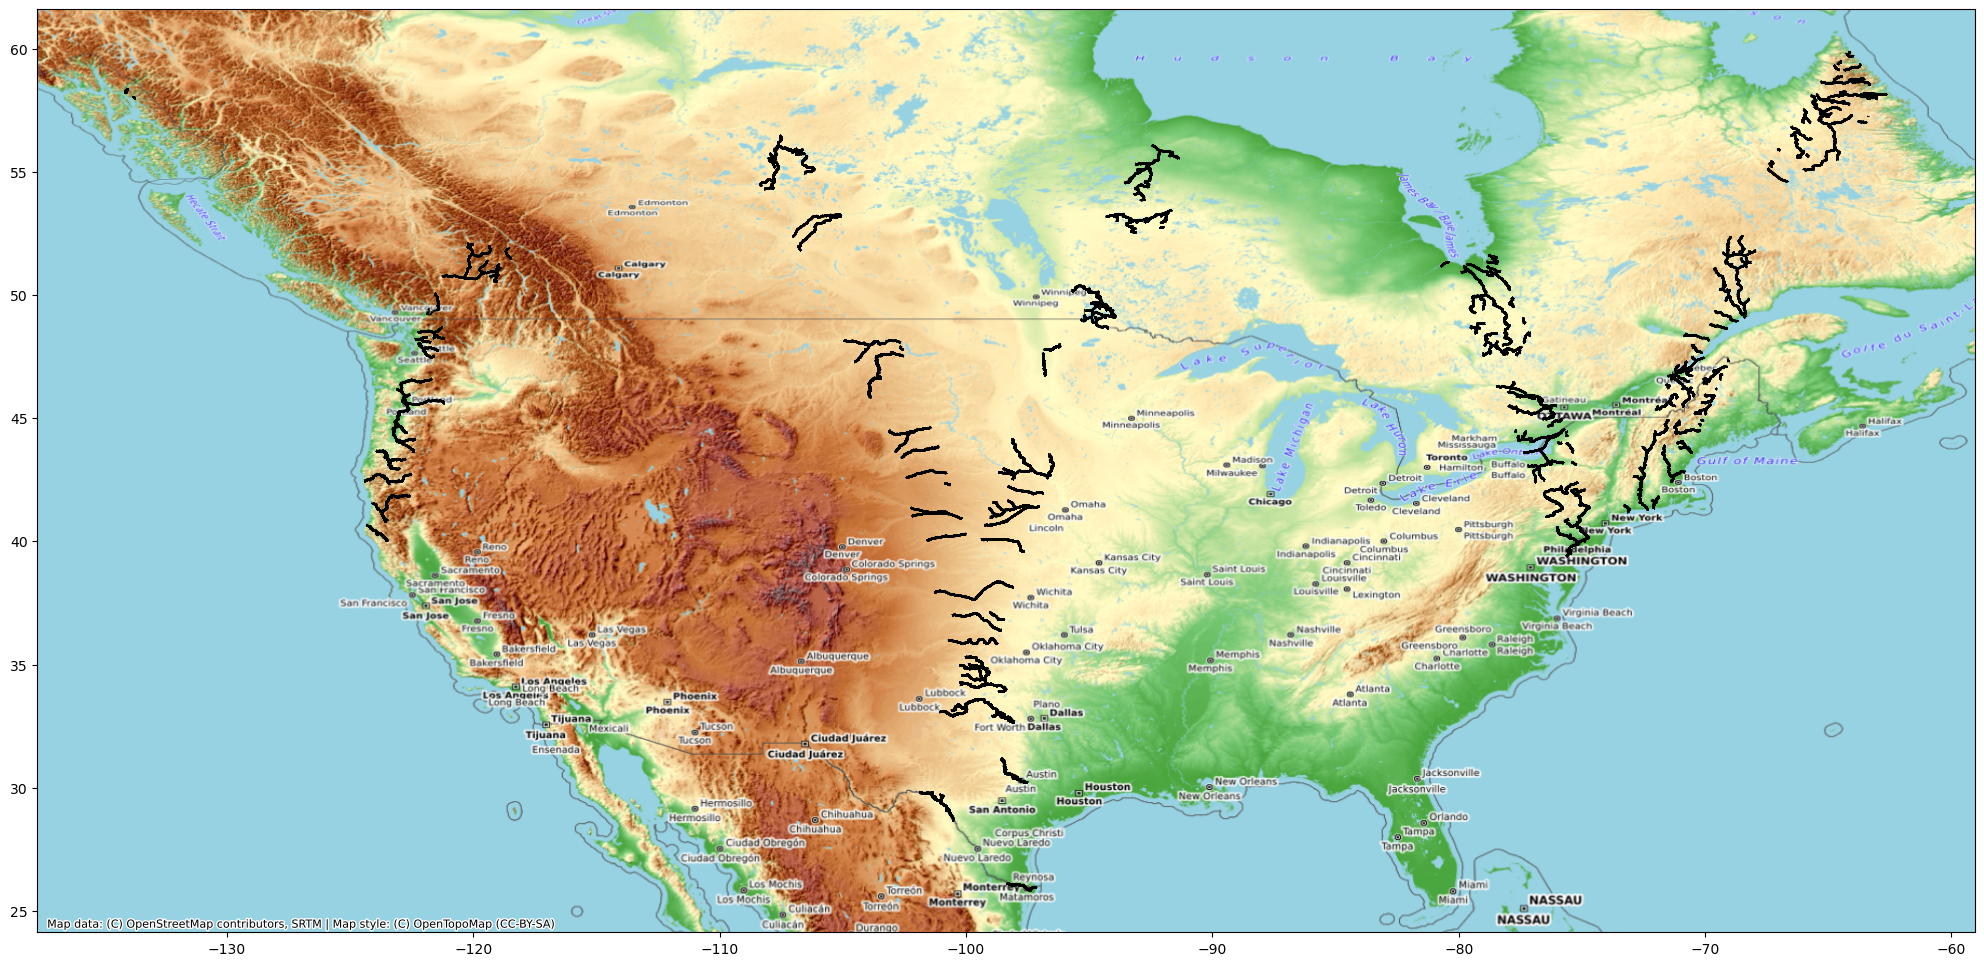

In [22]:
fig, ax = plt.subplots(figsize=(25,15))
gdf.plot(ax=ax, color='black')
cx.add_basemap(ax, crs=gdf.crs, source=cx.providers.OpenTopoMap)

The above plot shows the passes for the calibration phase of the SWOT orbit. The nominal orbit has much more coverage.